In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [121]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
tx = np.c_[np.ones((y.shape[0], 1)), x]

Use `least_squares` to compute w, and visualize the results.

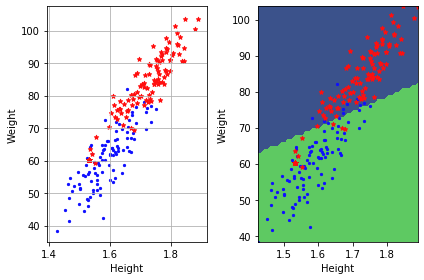

In [6]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w, mse = least_squares(y,tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [7]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    return np.exp(t)/(1+np.exp(t))

In [148]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    temp1 = np.log(1+np.exp(np.dot(tx,w)))
    temp2 = y*np.dot(tx,w)        #pour faire par element -> juste multiplier *
    return np.sum(temp1 - temp2, axis=0)

In [149]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    return np.dot(tx.T , sigmoid(np.dot(tx,w))-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [150]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    w = w - gamma*grad
    return loss, w

Demo!

Current iteration=0, loss=[138.62943611]
Current iteration=100, loss=[43.46403231]
Current iteration=200, loss=[41.54589281]
Current iteration=300, loss=[41.09863897]
Current iteration=400, loss=[40.96487064]
Current iteration=500, loss=[40.92008946]
Current iteration=600, loss=[40.90418744]
Current iteration=700, loss=[40.89834995]
Current iteration=800, loss=[40.89616497]
Current iteration=900, loss=[40.89533753]
Current iteration=1000, loss=[40.89502196]
Current iteration=1100, loss=[40.89490109]
Current iteration=1200, loss=[40.89485466]
Current iteration=1300, loss=[40.8948368]
Current iteration=1400, loss=[40.89482992]
Current iteration=1500, loss=[40.89482727]
loss=[40.89482664]


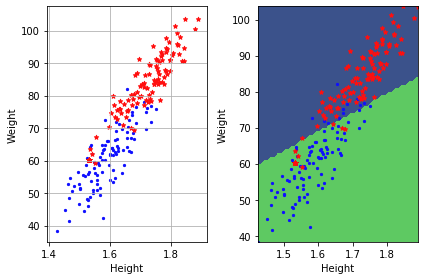

In [151]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [153]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    values_diag = sigmoid(np.dot(tx,w))*(1-sigmoid(np.dot(tx,w)))
    s = np.eye(tx.shape[0]) * values_diag
    return np.dot(tx.T,np.dot(s,tx))
    # ***************************************************

Write a function below to return loss, gradient, and hessian.

In [154]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    hessian = calculate_hessian(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    return loss, grad, hessian 

### Using Newton's method
Use Newton's method for logistic regression.

In [157]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hessian = logistic_regression(y, tx, w)
    w = w - gamma*np.dot(np.linalg.inv(hessian),grad)
    # update w: TODO
    return loss, w

demo

Current iteration=0, the loss=[138.62943611]
Current iteration=1, the loss=[126.31098317]
Current iteration=2, the loss=[116.17884132]
Current iteration=3, the loss=[107.6360377]
Current iteration=4, the loss=[100.30205497]
Current iteration=5, the loss=[93.92045949]
Current iteration=6, the loss=[88.31062659]
Current iteration=7, the loss=[83.34061998]
Current iteration=8, the loss=[78.91107491]
Current iteration=9, the loss=[74.94517505]
Current iteration=10, the loss=[71.38217682]
Current iteration=11, the loss=[68.17308538]
Current iteration=12, the loss=[65.27768185]
Current iteration=13, the loss=[62.66242564]
Current iteration=14, the loss=[60.29893947]
Current iteration=15, the loss=[58.16289282]
Current iteration=16, the loss=[56.23316457]
Current iteration=17, the loss=[54.49120613]
Current iteration=18, the loss=[52.92055178]
Current iteration=19, the loss=[51.50643913]
Current iteration=20, the loss=[50.23551383]
Current iteration=21, the loss=[49.09559917]
Current iteratio

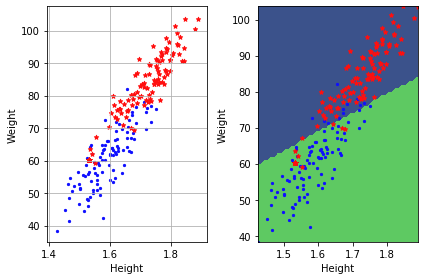

In [160]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    gamma = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [164]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    loss, grad, hessian = logistic_regression(y, tx, w)
    loss = lambda_/2*np.dot(w.T,w) + loss
    return loss, grad, hessian 

In [165]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    loss, grad, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma*np.dot(np.linalg.inv(hessian),grad)
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[72.08678271]]
Current iteration=200, loss=[[51.09571307]]
Current iteration=300, loss=[[44.60668035]]
Current iteration=400, loss=[[43.38182772]]
Current iteration=500, loss=[[43.41260421]]
Current iteration=600, loss=[[43.53842684]]
Current iteration=700, loss=[[43.6043257]]
Current iteration=800, loss=[[43.63139334]]
Current iteration=900, loss=[[43.64171146]]
Current iteration=1000, loss=[[43.64554402]]
Current iteration=1100, loss=[[43.64695438]]
Current iteration=1200, loss=[[43.64747163]]
Current iteration=1300, loss=[[43.64766109]]
Current iteration=1400, loss=[[43.64773046]]
Current iteration=1500, loss=[[43.64775585]]
Current iteration=1600, loss=[[43.64776515]]
Current iteration=1700, loss=[[43.64776855]]
loss=[40.89482561]


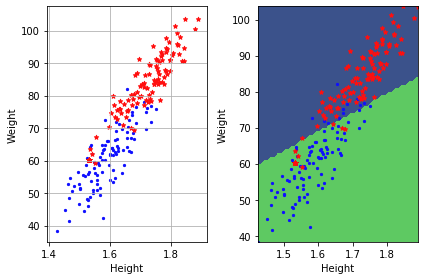

In [166]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)